In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def mmq_poly(x, y, n): # n: grau do polinomio
    A = np.vander(x, n+1) # Assim facilita usar o polyval
    AtA = np.dot(A.T, A)
    Atb = np.dot(A.T, y)
    alpha = np.linalg.solve(AtA, Atb)
    return alpha

def emq(y, f):
    return np.linalg.norm(y - f)**2 / f.shape[0]

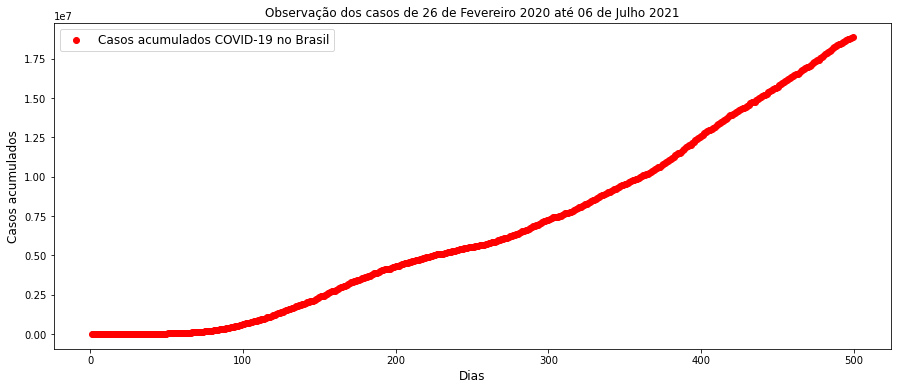

In [18]:
# Usando os dados do Covid coletados de 26 de Fevereiro 2020 até 06 de Julho 2021
totalcasos = np.genfromtxt(fname='covidcasosacumulados.txt') # y
dias = np.linspace(1, 499, num=499, endpoint=True) # x
#dias = np.arange(1,500)

# Plotar os dados
plt.figure(figsize=(15,6), facecolor='white')
plt.scatter(dias, totalcasos, label = 'Casos acumulados COVID-19 no Brasil',linewidth = 1,color='red')
plt.xlabel('Dias', fontsize='large') 
plt.ylabel('Casos acumulados', fontsize='large') 
plt.title('Observação dos casos de 26 de Fevereiro 2020 até 06 de Julho 2021') 
plt.legend(fontsize='large') 
plt.show()

97272874692.23286


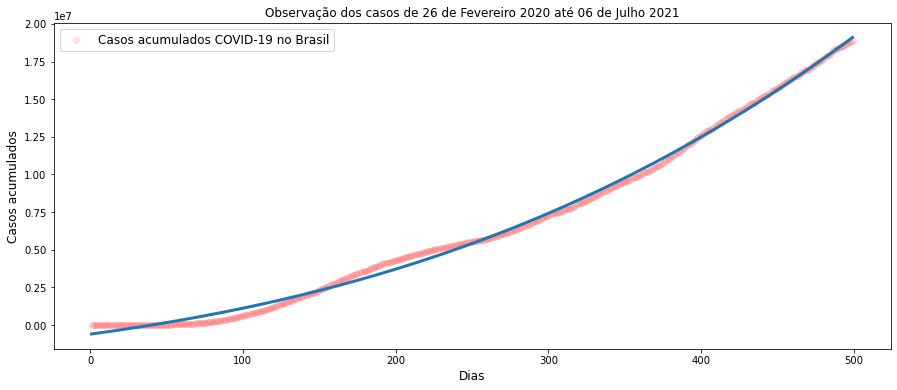

In [22]:
# Aproximar com polinomios de grau=1,2,3
# Calcular o erro
alpha = mmq_poly(dias, totalcasos, 3)

y = np.polyval(alpha, dias)

erro = emq(y, totalcasos)
print(erro)

#print(np.polyval(alpha, 500))

# Plotar os dados
plt.figure(figsize=(15,6), facecolor='white')
plt.scatter(dias, totalcasos, label = 'Casos acumulados COVID-19 no Brasil',linewidth = 1,color='red', alpha=0.1)
plt.plot(dias, y, linewidth=3)
plt.xlabel('Dias', fontsize='large') 
plt.ylabel('Casos acumulados', fontsize='large') 
plt.title('Observação dos casos de 26 de Fevereiro 2020 até 06 de Julho 2021') 
plt.legend(fontsize='large') 
plt.show()